# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_kelli.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a97ec3ba6ebf29fe454429ceb8a1d079&units=metric&q='

In [4]:
# create empty lists to store data
latitudes = []
longitudes = []
temps = []
winds = []
pressures = []
humidities = []
countries = []
dates = []
clouds = []

# requst information for each city
for city in cities:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        data = response.json()
        
        try:
            # extract all data points before appending (don't append twice)
            latitude = data['coord']['lat']
            longitude = data['coord']['lon']
            temp = data['main']['temp']
            pressure = data['main']['pressure']
            humidity = data['main']['humidity']
            wind = data['wind']['speed']
            country = data["sys"]["country"]
            date = data["dt"]
            cloud = data['clouds']['all']
            
            # append to lists
            latitudes.append(latitude)
            longitudes.append(longitude)
            temps.append(temp)
            pressures.append(pressure)
            humidities.append(humidity)
            winds.append(wind)
            countries.append(country)
            dates.append(date)
            clouds.append(cloud)
            
        except: # we failed to extract all data points
            latitudes.append(np.nan)
            longitudes.append(np.nan)
            temps.append(np.nan)
            winds.append(np.nan)
            pressures.append(np.nan)
            humidities.append(np.nan)
            countries.append("")
            dates.append(np.nan)
            clouds.append(np.nan)
    else:
        latitudes.append(np.nan)
        longitudes.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        humidities.append(np.nan)
        countries.append("")
        dates.append(np.nan)
        clouds.append(np.nan)
    
    print(city)
    time.sleep(1)

butaritari
cape town
gusau
cidreira
puerto ayora
vaini
kaili
alofi
busselton
barrow
pevek
ushuaia
rikitea
nanortalik
tautira
bambous virieux
torbay
bredasdorp
ghanzi
punta arenas
hithadhoo
san cristobal
avera
albany
hermanus
biasca
boddam
lagoa
mar del plata
saint-philippe
ranong
avarua
college
kuybyshevskiy zaton
lavrentiya
hay river
bluff
haikou
perth
mount gambier
castro
upernavik
georgetown
hasaki
leshukonskoye
new norfolk
tiksi
arraial do cabo
mahebourg
falealupo
kapaa
atuona
ouesso
mataura
kon tum
east london
mangrol
tuktoyaktuk
vaitupu
souillac
porto novo
beyneu
nong chik
kavieng
arman
severo-kurilsk
port alfred
los algarrobos
nikolskoye
jamestown
norman wells
amderma
saint george
belushya guba
yanam
aklavik
tongliao
tilichiki
loubomo
bunia
khatanga
pavino
acapulco
matay
chuy
barentsburg
charters towers
smithers
marcona
petropavlovsk-kamchatskiy
saleaula
kuche
lagos
ohara
grand-santi
olinda
carlton
yongan
soe
guerrero negro
toungoo
longyearbyen
port elizabeth
shingu
kollumerland

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame()

weather_data["City"] = cities
weather_data["Country"] = country
weather_data["Latitude"] = latitudes
weather_data["Longitude"] = longitudes
weather_data["Temperature"] = temps
weather_data["Wind"] = winds
weather_data["Pressure"] = pressures
weather_data["Humidity"] = humidities
weather_data['Cloudiness'] = clouds
weather_data["Date"] = dates

weather_data = weather_data.dropna()
weather_data.head()

,City,Country,Latitude,Longitude,Temperature,Wind,Pressure,Humidity,Cloudiness,Date
0,butaritari,PG,3.0707,172.7902,28.13,6.52,1013.0,66.0,11.0,1.628377e+09
1,cape town,PG,-33.9258,18.4232,10.04,1.54,1015.0,100.0,90.0,1.628377e+09
2,gusau,PG,12.1628,6.6614,23.86,6.49,1013.0,86.0,83.0,1.628377e+09
3,cidreira,PG,-30.1811,-50.2056,16.29,5.68,1019.0,90.0,2.0,1.628377e+09
4,puerto ayora,PG,-0.7393,-90.3518,21.97,3.58,1013.0,84.0,68.0,1.628377e+09


In [6]:
weather_data.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
mask = weather_data.Humidity >100
weather_data.loc[mask]

,City,Country,Latitude,Longitude,Temperature,Wind,Pressure,Humidity,Cloudiness,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

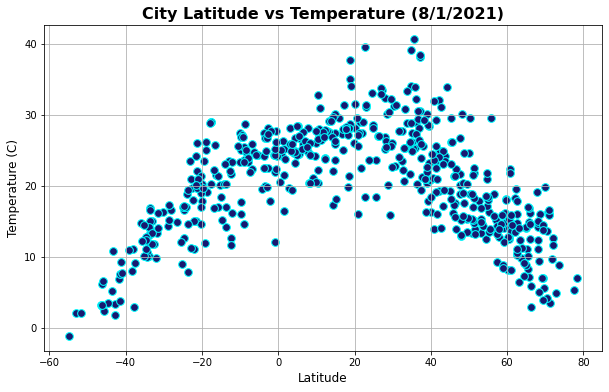

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Temperature,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.title("City Latitude vs Temperature (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Temperature (C)",fontsize=12)
plt.grid()
plt.savefig("../output_data/lat_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

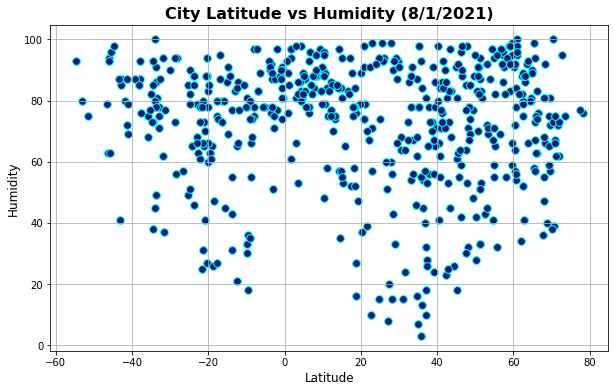

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Humidity,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.title("City Latitude vs Humidity (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity",fontsize=12)
plt.grid()
plt.savefig("../output_data/lat_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

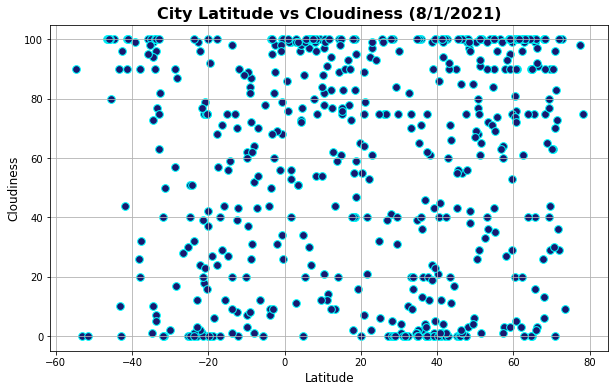

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Cloudiness,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.title("City Latitude vs Cloudiness (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness",fontsize=12)
plt.grid()
plt.savefig("../output_data/lat_cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

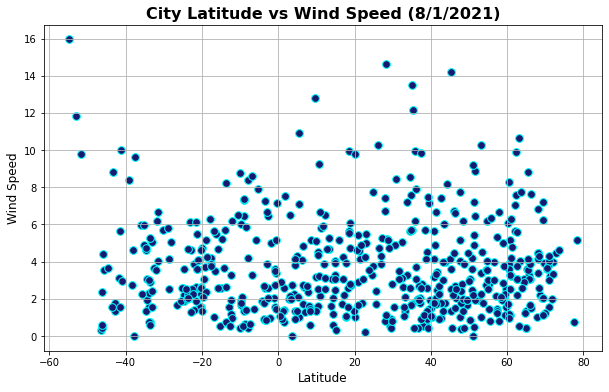

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Wind,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.title("City Latitude vs Wind Speed (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.grid()
plt.savefig("../output_data/lat_wind_plot.png")
plt.show()

## Linear Regression

In [14]:
df_north = weather_data.loc[weather_data.Latitude >= 0].reset_index()
df_south = weather_data.loc[weather_data.Latitude < 0].reset_index()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4809703236963838


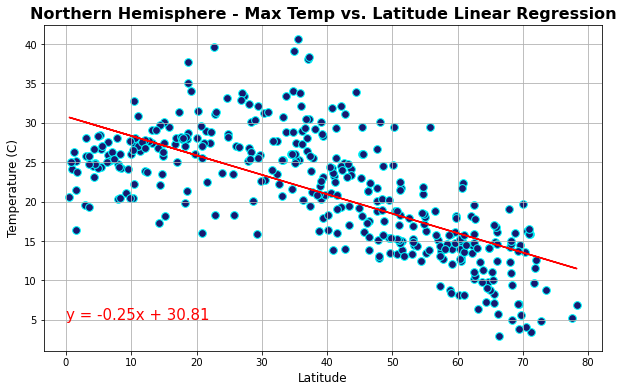

In [15]:
 # Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Temperature (C)',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_temp_regress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7017147447758886


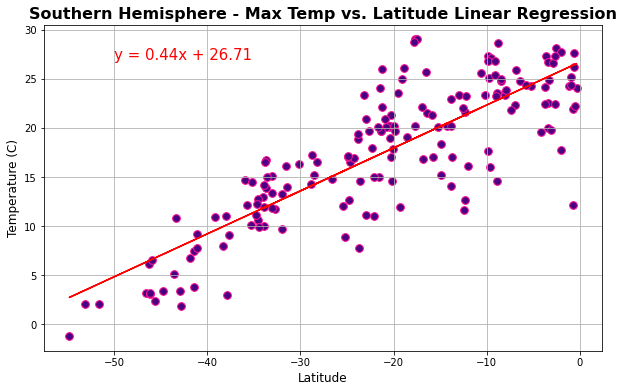

In [16]:
 # Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="indigo",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,27),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Temperature (C)',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/SH_lat_temp_regress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0039727050794464


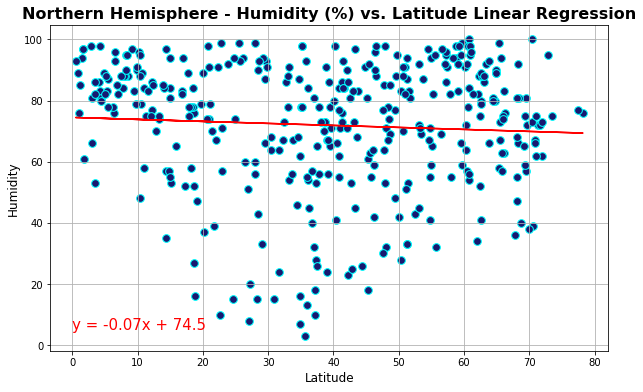

In [17]:
 # Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_humidity_regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0029607812843754524


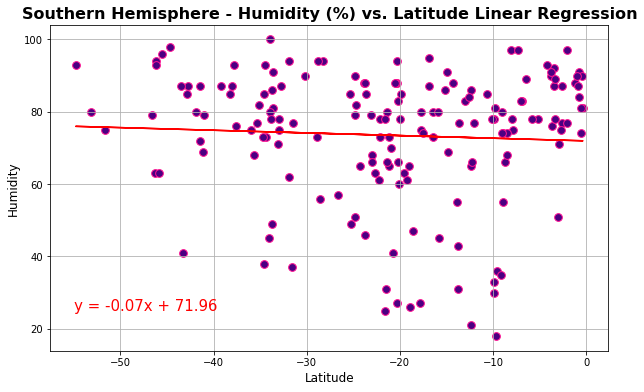

In [18]:
 # Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="indigo",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_lat_humidity_regress.png")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002320492586303479


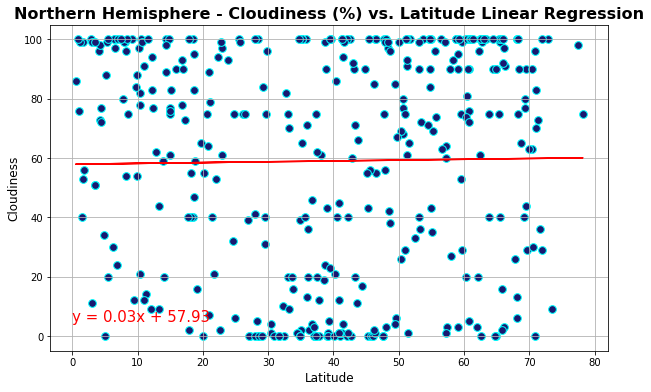

In [19]:
 # Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_couldiness_regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012928605721300203


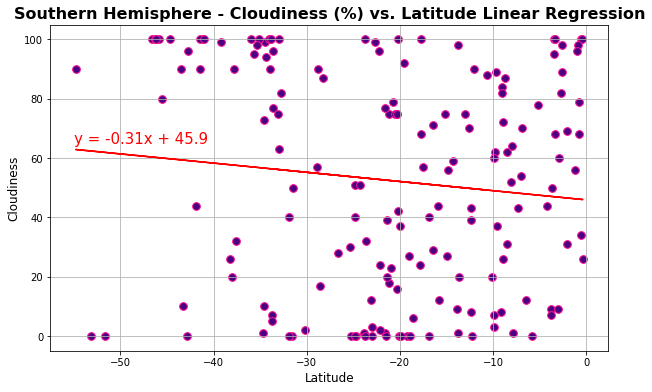

In [20]:
 # Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="indigo",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/SH_lat_couldiness_regress.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00029092329834105244


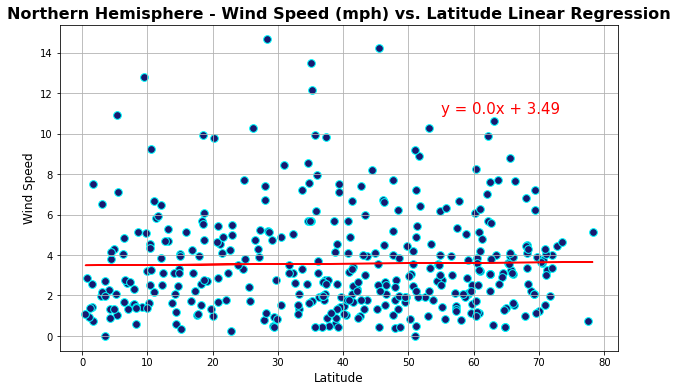

In [21]:
 # Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="cyan",facecolor="midnightblue",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,11),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_wind_regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02142139914609052


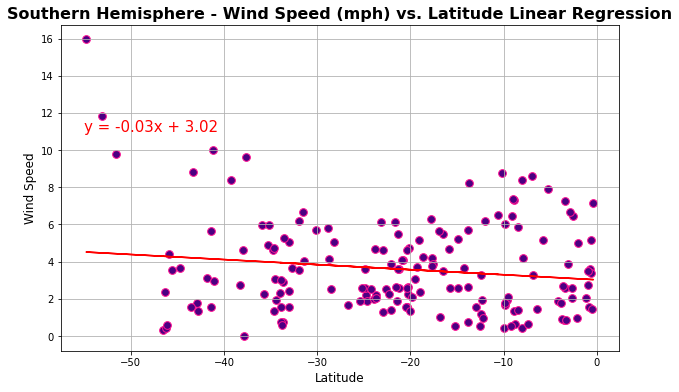

In [22]:
 # Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="indigo",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/SH_lat_wind_regress.png")
plt.show()

# WeatherPy Analysis

- 39.6% of the varience seen in Temperature can be explained by Latitude in the Northern Hemisphere
- 67.6% of the varience seen in Temperature can be explained by Latitude in the Southern Hemisphere
- There are no strong corrolations between Latitude vs Humidity, Wind Speed, or Cloudiness in either the Northern or Southern Hempispheres.